<a href="https://colab.research.google.com/github/lkarjun/malayalam-language-model/blob/main/Data-Preprocessing/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Downloading

In [ ]:
!pip install dvc[gdrive]

!dvc get https://github.com/lkarjun/malayalam-language-model \
Datasets/

In [ ]:
!unzip 'Datasets/*.zip' -d Datasets/

# Packages importing

In [ ]:
# !pip install fastai==2.5.3
# !pip install textacy

In [6]:
import pandas as pd
import spacy
from tqdm import tqdm
from pathlib import Path
import textacy.preprocessing as tprep
import re

tqdm.pandas()

BASE_PATH = Path("../Datasets/")

In [7]:
from fastai.text.core import *
from fastai.text.all import *

# Dataset Loading

In [8]:
mag = pd.read_csv(BASE_PATH/'magazine_files.csv')
wiki = pd.read_csv(BASE_PATH/'wikitext_files.csv')

In [11]:
wiki.head(2)

,file_path,dataset_name,length
0,Datasets/wikitext_raw/wiki0.txt,wiki_text,303
1,Datasets/wikitext_raw/wiki1.txt,wiki_text,3242


In [10]:
mag.head(2)

,file_path,dataset_name,length
0,Datasets/magazine_raw/mag0.txt,magazine_text,4383
1,Datasets/magazine_raw/mag1.txt,magazine_text,1140


In [12]:
def open_files(path: str):
    with open(path, 'r', encoding='utf-8') as file:
        txt = file.read()
    return txt

mag['content'] = mag['file_path'].progress_apply(open_files)
wiki['content'] = wiki['file_path'].progress_apply(open_files)

100%|██████████| 12388/12388 [00:00<00:00, 19878.22it/s]


In [13]:
mag.head(4)

,file_path,dataset_name,length,content
0,Datasets/magazine_raw/mag0.txt,magazine_text,4383,"ഇന്ത്യയിലെ ആദ്യത്തെ വനിതാ ഐ‌എ‌എസ് ഉദ്യോഗസ്ഥയെ കുറിച്ചറിയാമോ? അവരുടെ പേരാണ് അന്ന രാജം മൽഹോത്ര. അവർ ഒരു മലയാളി കൂടിയാണ് എന്നത് നാം മലയാളികൾക്ക് അഭിമാനിക്കാനുള്ള വകയാണ്. കുഞ്ഞുകുട്ടി പ്രാരാബ്ദങ്ങളുമായി വീടുകളിൽ ഒതുങ്ങി കഴിഞ്ഞിരുന്ന സ്ത്രീകൾക്കിടയിൽ അന്ന രാജം മൽ‌ഹോത്ര വേറിട്ട് നിന്നു. സമൂഹത്തിൽ നിലനിന്നിരുന്ന അസമത്വത്തിനെതിരെ, ലിംഗ അനീതികൾക്കെതിരെ പോരാടിയ സ്ത്രീയാണ് അവർ, ഇന്ത്യയിലെ ആദ്യത്തെ വനിതാ ഐ‌എ‌എസ് ഉദ്യോഗസ്ഥ. കേന്ദ്രസർക്കാരിൽ സെക്രട്ടേറിയൽ പദവി വഹിച്ച ആദ്യ വനിത കൂടിയായിരുന്നു അവർ. വളരെ പ്രചോദനാത്മകമായ അവരുടെ കഥ. 1927 ജൂലൈ 17 -ന് കേരളത്തിലെ നിരണം ഗ്രാമത്തിൽ ജനിച്ച അന്ന, മദ്രാസ് സർവകലാശാലയ..."
1,Datasets/magazine_raw/mag1.txt,magazine_text,1140,"ഒരു മ്യുസീഷന് ഡാന്‍സ് ചെയ്യാനാവും, ഡ്രം വായിക്കാനുമാവും. ഡ്രം വായിച്ചുകൊണ്ടിരിക്കെ ഡാന്‍സ് ചെയ്യാനാവും. ആ കലാകാരന്‍റെ വീഡിയോ ഇപ്പോള്‍ സാമൂഹിക മാധ്യമങ്ങളില്‍ വൈറലാവുകയാണ്. നിരവധിപ്പേരാണ് ഇദ്ദേഹത്തിന്‍റെ കഴിവുകളെ പ്രശംസിച്ചിട്ടു കൊണ്ട് മുന്നോട്ട് വന്നിരിക്കുന്നത്. തിമോത്തി ഫ്ലെച്ചര്‍ എന്നാണ് അദ്ദേഹത്തിന്‍റെ പേര്. 'ബാൾട്ടിമോറിന്‍റെ കുട്ടി, കൂടുതൽ എന്തെങ്കിലും ആവാന്‍ ആഗ്രഹിക്കുകയും അതിനായി പ്രവർത്തിക്കുകയും ചെയ്യുന്നയാളാണ്' എന്നാണ് തിമോത്തി ഫ്ലെച്ചറിന്‍റെ ഇന്‍സ്റ്റഗ്രാം ബയോ പറയുന്നത്. ഏതായാലും ഫ്ലെച്ചര്‍ പങ്കുവച്ച വീഡിയോ വളരെ ചുരുങ്ങിയ സമയം കൊണ്ടാണ് വൈറലായത്. A post shared by Formerly Known A..."
2,Datasets/magazine_raw/mag2.txt,magazine_text,11197,"വായന തുറന്നുതരുന്ന ലോകത്തെ കുറിച്ച് നിങ്ങളെന്ത് പറയുന്നു? ഏത് ഒറ്റമുറിയിൽ കുടുങ്ങിപ്പോയവർക്കും ഒരടി പോലും കാലുവയ്ക്കാതെ നടത്താവുന്ന അനേകസാധ്യതകളുള്ള യാത്രകളാണ് പുസ്തകം സമ്മാനിക്കുന്നത്. എഴുത്തുകാരൻ എഴുതി അവസാനിച്ചിടത്തുനിന്നുമാണ് ശരിക്കും ആ പുസ്തകം തുടങ്ങുന്നത് തന്നെ. പിന്നീടുള്ള 'വിഷ്വലു'കൾ മുഴുവനും നമ്മുടെ ഉള്ളിൽ നിന്നുമാണ് പിറക്കുന്നത്. എങ്ങനെയും രൂപം നൽകാം, ഏത് വഴിയിലൂടെയും നടത്തിക്കാം. ചില പുസ്തകങ്ങളാകട്ടെ തീർക്കാതെ കയ്യിൽ നിന്നും താഴെ വയ്ക്കാൻ തോന്നാത്തവയാണ്. വായിച്ചവസാനിക്കാതെ നമ്മെക്കൊണ്ട് മറ്റൊന്നും ചെയ്യിക്കാത്തവ. ആ ലോകത്തിലാണ് നമ്മളെന്ന് തോന്നിപ്പിക്കുന്നവ. വായിച്ച് തീർത്ത് അടച്..."
3,Datasets/magazine_raw/mag3.txt,magazine_text,845,"ജീവിതത്തോടുള്ള ആര്‍ത്തി. അതായിരുന്നു, വനം വകുപ്പിന്റെ കൂട്ടില്‍നിന്നും കാട്ടിലേക്കുള്ള ആ കടുവയുടെ ചാട്ടത്തിന്റെ കരുത്ത്. ട്വിറ്ററില്‍ ഏറെ ചര്‍ച്ച ചെയ്യപ്പെട്ട ഒരു വീഡിയോയിലാണ് ആ കടുവയുള്ളത്. ബിഹാറിലെ ഉന്നത വനംവകുപ്പ് ഉദ്യോഗസ്ഥന്‍ രമേശ് പാണ്ഡേയാണ് കടുവയുടെ അതിജീവന ഉല്‍സാഹങ്ങള്‍ തുളുമ്പുന്ന ആ ഫോട്ടോ ട്വീറ്റ് ചെയ്തത്. ആ വീഡിയോയിലുള്ളത് ഒരു വനംവകുപ്പ് വാഹനമാണ്. അതിന്റെ പുറകില്‍ ഒരു കൂടുണ്ട്, കൂട്ടിലൊരു കടുവയും. ഉത്തരവ് ലഭിക്കുമ്പോള്‍, കൂടു പതിയെ തുറന്നു വരുന്നു. കടുവ ജീവനും കൊണ്ട് രക്ഷപ്പെട്ട് കാട്ടിലേക്ക് കുതിക്കുന്നു. ബിഹാറിലെ വാല്‍മീകി ടൈഗര്‍ റിസര്‍വിലാണ് സംഭവമെന്നാണ് ട്വീറ്റ് വിശദീകരി..."


In [14]:
wiki.head(4)

,file_path,dataset_name,length,content
0,Datasets/wikitext_raw/wiki0.txt,wiki_text,303,2015 ലെ ഇടശ്ശേരി പുരസ്കാരം നേടിയ ചെറുകഥാകൃത്ത് ആണ് ഷാഹിന ഇ കെ .മലയാള സാഹിത്യത്തിലെ ശ്രദ്ധേയരായ ചെറുകഥ എഴുത്തുകാരിൽ ഒരാളാണ്.പുതുമഴ ചൂരുള്ള ചുംബനങ്ങൾ എന്ന കൃതിക്കാണ് പുരസ്‌കാരം ലഭിച്ചത് .കേരളത്തിലെ മലപ്പുറം ജില്ലയിലെ പെരിന്തൽമണ്ണ സ്വദേശിയാണ് .മലപ്പുറം ഇരുമ്പുഴി ഹയർ സെക്കന്ററി സ്കൂൾ അധ്യാപികയാണ് .\n\n\n\n\n\n\n\n
1,Datasets/wikitext_raw/wiki1.txt,wiki_text,3242,"മൃദുവും, വെളുത്ത നിറത്തിലുള്ളതും, തിളക്കമേറിയതുമായ ഒരു ലോഹമാണ് വെള്ളി അഥവാ രജതം . ആവർത്തനപ്പട്ടികയിൽ സംക്രമണമൂലകങ്ങളുടെ കൂട്ടത്തിലാണ് ഇതിന്റെ സ്ഥാനം. വെള്ളിയുടെ ആറ്റോമിക സംഖ്യ 47 ആണ്. പ്രതീകം: Ag. എല്ലാ ലോഹങ്ങളിലും വച്ച് ഏറ്റവും കൂടുതൽ താപ വൈദ്യുത ചാലകത പ്രകടിപ്പിക്കുന്നത് വെള്ളിയാണ്. പ്രകൃതിയിൽ ഇത് ധാതു രൂപത്തിലും അല്ലാതെ സ്വതന്ത്രമായും ഇത് കാണപ്പെടുന്നു. നാണയങ്ങൾ, ആഭരണങ്ങൾ, കരണ്ടികൾ, പാത്രങ്ങൾ, കണ്ണാടികൾ എന്നിവയുടെ നിർമ്മാണത്തിനും ഛായഗ്രഹണമേഖലയിലും വെള്ളി ഉപയോഗിക്കുന്നു.\t\nവെള്ളി വളരെ ലോലമായ ഒരു ലോഹമായതിനാൽ അതിനെ അടിച്ചു പരത്താനും വലിച്ചു നീട്ടാനും എളുപ്പമാണ്. ലോഹങ്ങളിൽ വച്ച് ഏറ്റവും നല..."
2,Datasets/wikitext_raw/wiki2.txt,wiki_text,1151,പ്രാഗ്ജ്യോതിഷത്തിലെ രാജാവായ നരകാസുരന്റെ പുത്രനാണ് ഭഗദത്തൻ. നരകാസുരനെ വധിച്ചത് ഭഗവാൻ ശ്രീകൃഷ്ണനായിരുന്നു. ഭഗദത്തനെ കുരുക്ഷേത്രയുദ്ധത്തിൽ അർജ്ജുനനാണ് വധിച്ചത്. ഭഗദത്തൻ ആനപ്പുറത്തേറിയാണ് പാണ്ഡവരോട് യുദ്ധം ചെയ്തത്. കുരുക്ഷേത്രയുദ്ധത്തിലെ ഭഗദത്തന്റെ ആനയെ മഹാഭാരതത്തിൽ വ്യാസൻ ഉപമിക്കുന്നത് അഷ്ടദിക്ഗജങ്ങളിലെ ഒരാനയായ സുപ്രതികനോടാണ്. \nമഹാഭാരതത്തിൽ ദ്രോണപർവ്വത്തിൽ ഭഗദത്തനെക്കുറിച്ച് വിവരിക്കുന്നുണ്ട്. കുരുക്ഷേത്രയുദ്ധത്തിൽ പ്രാഗ്ജ്യോതിഷവും പങ്കെടുത്തിരുന്നു. അന്നത്തെ രാജാവായിരുന്ന ഭഗദത്തൻ കൗരവപക്ഷത്തു ചേർന്നാണ് യുദ്ധം ചെയ്തത്. വാർദ്ധക്യം ഉണ്ടായിരുന്നെങ്കിലും തന്റെ ആനപ്പുറത്തേറി പന്ത്രണ്ടു ദിവസം പാണ്...
3,Datasets/wikitext_raw/wiki3.txt,wiki_text,3989,"Coordinates: 25°16′55″N 82°57′23″E / 25.282°N 82.9563°E / 25.282; 82.9563\nഉത്തർ പ്രദേശ് സംസ്ഥാനത്ത് ഗംഗ നദിയുടെ പടിഞ്ഞാറൻ തീരത്ത് ഏതാണ്ട് 6 കിലോമീറ്ററിലധികം‌ നീളത്തിൽ സ്ഥിതി ചെയ്യുന്ന ഒരു പട്ടണമാണ് ബനാറസ് ), കാശി ) എന്നീ പേരുകളിൽ അറിയപ്പെടുന്ന വാരാണസി ). ഹിന്ദുക്കളുടെയും, ബുദ്ധമതക്കാരുടേയും, ജൈനമതക്കാരുടേയും പുണ്യ നഗരമായ ഇത് ലോകത്തിലെ ഏറ്റവും പഴയ നഗരങ്ങളിൽ ഒന്നായി കണക്കാക്കപ്പെടുന്നു. 1200 ബി.സി.ഇ. മുതലേ ഇവിടെ നഗരം നിലനിന്നിരുന്നു എന്നു കരുതുന്നു.ഹിന്ദു ത്രിമൂർത്തികളിലൊരാളായ ശിവൻറെ ത്രിശ്ശൂലത്തിന്മേലാണത്രെ കാശിയുടെ കിടപ്പ്. കാശി എന്നതിന് പ്രകാശമാനം എന്നും അർത്ഥമുണ്ട്. പണ്ഡിതരുടേയും ജ്ഞാനി..."


# Preprocessing

## Checking impurity

In [15]:
RE_SUSPICIOUS = re.compile(r'\(.*?\)|[a-zA-Z]')

def check_impurity(content: str, min_len = 200):
    '''returns the share of suspicious characters in a text'''
    len_text = len(content)
    if content == None or len_text < min_len:
        return 0
    return len(RE_SUSPICIOUS.findall(content)) / len_text


In [16]:
mag['impurity'] = mag['content'].progress_apply(check_impurity)
wiki['impurity'] = wiki['content'].progress_apply(check_impurity)

100%|██████████| 12388/12388 [00:00<00:00, 15871.70it/s]


In [17]:
mag.sort_values(by = 'impurity', ascending=False).head(5)

,file_path,dataset_name,length,content,impurity
7649,Datasets/magazine_raw/mag7649.txt,magazine_text,1736,"രാജ്യം സ്വാതന്ത്ര്യ ദിനം ആഘോഷിക്കുമ്പോള്‍, നാം നിര്‍ബന്ധമായും കണ്ടിരിക്കേണ്ട കുറച്ചു ചിത്രങ്ങള്‍ ഇതാ ഇവിടെ. ഇന്ത്യയുടെ ആദ്യത്തെ സ്വാതന്ത്ര്യ ദിനാഘോഷ വേളയിലുള്ള ഈ ചിത്രങ്ങള്‍ ട്വിറ്ററിലാണ് ഷെയര്‍ ചെയ്തത്. കാണാം, ആ ചിത്രങ്ങള്‍: 15 August 1947 :: Scene on Independence Day in Delhi pic.twitter.com/Ra9Ygb5qlM 15 August 1947 :: Crowd Gathered at Delhi’s Red Fort #India जय हिन्द pic.twitter.com/dp02uHOk6B 15 August 1947 :: Scene at Red Fort on First Independence Day (Photo - Homai Vyarawalla ) #India pic.twitter.com/ZhoNrZrjHq 15 August 1947 :: Citizens in Calcutta celebrating Independence day...",0.591014
7749,Datasets/magazine_raw/mag7749.txt,magazine_text,7809,കാലിഫോര്‍ണിയ: ഗ്ലാമറിന്റെ ലോകം ഉപേക്ഷിച്ച് ആത്മീയ ജീവിതത്തിലേക്ക് തിരിഞ്ഞ പ്രശസ്ത മോഡല്‍ സോഫിയ ഹയാത്ത് ഇപ്പോള്‍ ഇന്ത്യന്‍ ആത്മീയതയില്‍ മുഴുകിയിരിക്കുകയാണ്. ബിഗ് ബോസ് റിയാലിറ്റി ഷോയിലൂടെ പ്രശസ്തയായ സോഫിയാ ഹയാത്ത് ഈയിടെ നടത്തിയ ഇന്ത്യന്‍ യാത്രകളുടെ അനുഭവം ഇന്‍സ്റ്റഗ്രാമിലൂടെ പങ്കുവെച്ചു. ഔറംഗബാദിലെ കൈലാശ് ക്ഷേത്രത്തില്‍ നടത്തിയ യാത്രയിലുടനീളം ശിവഭക്തിയുടെ ലഹരിയിലായിരുന്നു താനെന്ന് അവര്‍ ഇന്‍സ്റ്റഗ്രാമില്‍ എഴുതി. ശരീര പ്രദര്‍ശനത്തിലൂടെ വാര്‍ത്തകളില്‍ നിറഞ്ഞ സോഫിയ ഹയാത്ത് സന്യാസിനി ആയി. താന്‍ സന്യാസ ജീവിതത്തിലേക്ക് മാറിയതായി സോഫിയ ഇന്‍സ്റ്റഗ്രാമിലൂടെയാണ് നേരത്തെ അറിയിച്ചത്.ഇത് വലിയ വാര്‍ത്തയാ...,0.576770
5885,Datasets/magazine_raw/mag5885.txt,magazine_text,3058,"അഞ്ചുവയസുകാരിയായ ഈ നൈജീരിയന്‍ പെണ്‍കുട്ടി സകല മോഡലുകളെയും പിറകിലാക്കി സോഷ്യല്‍ മീഡിയ കീഴടക്കുകയാണ്. 'ലോകത്തിലെ തന്നെ സുന്ദരി' എന്ന് വിളിക്കാന്‍ തോന്നുന്ന ആ പെണ്‍കുട്ടിയുടെ പേര് ജാരെ എന്നാണ്. പ്രൊഫഷണല്‍ മോഡലുകളെ വെല്ലുന്ന നോട്ടവും ഇരിപ്പും അവളെ പ്രത്യേകതയുള്ളവളാക്കുന്നു. J A R E @the_j3_sisters CHILDREN ARE A GIFT FROM HEAVEN. I’m pretty excited and elated about my new style of child portraiture . Before I thought of Photographing the @the_j3_sisters , I have had frivolous ideas of how I can make artsy portraits of kids And do away from the norm . The opportunity came and I had to take a b...",0.466645
7668,Datasets/magazine_raw/mag7668.txt,magazine_text,4918,"തിരുവനന്തപുരം: വ്യത്യസ്ത ലൈംഗികതയുടെ സൗന്ദര്യം വിളിച്ചോതി, മാനവീയം വീഥിയില്‍ നടന്ന ലൈംഗിക സ്വാഭിമാന ഘോഷയാത്ര വ്യത്യസ്തമായ ഒരനുഭവമായിരുന്നു. ഈ മാസം 12ന് കോഴിക്കോട് നടക്കുന്ന ഏഴാമത് ലൈംഗിക സ്വാഭിമാന ഘോഷയാത്രക്ക് മുന്നോടിയായാണ് തിരുവനന്തപുരത്ത് രണ്ടായിരത്തോളം പേര്‍ ഒത്തുചേര്‍ന്നത്. കൂട്ടായ്മക്ക് പിന്തുണ പ്രഖ്യാപിച്ച് മന്ത്രി കടകംപള്ളി സുരേന്ദ്രനും പ്രമുഖ എഴുത്തുകാരന്‍ സക്കറിയ അടക്കമുള്ള സാംസ്‌കാരിക പ്രവര്‍ത്തകരും എത്തിയിരുന്നു. 'വിമത ലൈംഗികത' എന്ന പുസ്തകം ശീതളിന് നല്‍കി സക്കറിയ പ്രകാശനം ചെയ്തു.\n \nമാനവീയം വീഥിയില്‍ നിന്നും എബി തരകന്‍ പകര്‍ത്തിയ ചിത്രങ്ങളും വീഡിയോകളുമാണ് ഇവിടെ. Kera...",0.458723
5232,Datasets/magazine_raw/mag5232.txt,magazine_text,1965,"ദില്ലി: മഞ്ഞുകാലമായി, വാര്‍ഡ്രോബില്‍ നിന്നും സ്വെറ്ററടക്കമുള്ള വസ്ത്രങ്ങള്‍ പുറത്തെടുക്കാന്‍ സമയമായി. പ്രത്യേകിച്ച് ഉത്തരേന്ത്യന്‍ നഗരങ്ങളില്‍. മനുഷ്യര്‍ ഷാളും, സ്വെറ്ററും ഒക്കെയായിട്ടാണ് മഞ്ഞുകാലത്തെ മറികടക്കുന്നത്. ഈ സമയത്ത് ഏറ്റവുമധികം തണുത്ത് വലയുന്നത് തെരുവില്‍ ജീവിക്കുന്ന മൃഗങ്ങളാണ്. ഹൌസ് ഓഫ് സ്ട്രേ ആനിമല്‍സ്, തുടങ്ങിയ എന്‍.ജി.ഒകള്‍ തെരുവുനായകളെ തണുപ്പില്‍ നിന്ന് രക്ഷിക്കാനായി എത്തിയിരിക്കുകയാണ്. ഇതിനായി വൂളന്‍ പുതപ്പുകള്‍, സ്വെറ്ററുകള്‍, ബെഡ്ഡുകള്‍ എന്നിവയാണ് നല്‍കുന്നത്. തണുപ്പിനെ മറികടക്കാന്‍ ഇങ്ങനെയാണ് അവര്‍ പ്രിയപ്പെട്ട മൃഗങ്ങളെ സഹായിക്കുന്നത്. ഹൌസ് ഓഫ് സ്ട്രേ ആനിമല്‍സ് പ്രവര...",0.450382


In [18]:
wiki.sort_values(by = 'impurity', ascending=False).head(5)

,file_path,dataset_name,length,content,impurity
6028,Datasets/wikitext_raw/wiki6028.txt,wiki_text,3400,\nXenochloa arundinacea Licht.Trichoon phragmites RendleRemirea diffusa Sieber ex Steud.Reimaria diffusa Spreng.Phragmites xenochloa Trin. ex Steud.Phragmites willkommianus MabillePhragmites vulgaris Crép.Phragmites stenophyllus RouyPhragmites pungens A.Chev.Phragmites pumilus Willk.Phragmites phragmites var. subuniflorus Phragmites phragmites H.Karst.Phragmites occidentalis Trin. ex Steud.Phragmites nigricans MabillePhragmites nakaianus HondaPhragmites nagus Steud.Phragmites minor Steud.Phragmites maximus var. variegatus Phragmites maximus var. berlandieri Phragmites martinicensis Trin. e...,0.811765
5587,Datasets/wikitext_raw/wiki5587.txt,wiki_text,1406,"\n.Gyrocarpus americanus is a flowering plant in the Hernandiaceae family, with a wide pantropical distribution. Its common names include the helicopter tree, propeller tree, whirly whirly tree, stinkwood or shitwood.\nGyrocarpus americanus is a slender, deciduous tree with smooth, grey bark. The tree grows to about 12 m in height. \nThe leaves are spirally arranged, crowded near the ends of the branches, and grow up to 150 × 120 mm in size. They are ovate, often 3-lobed, dark green above, paler and greyer below, with velvety surfaces, 3-veined from the base. The veins are yellowish and th...",0.794452
7581,Datasets/wikitext_raw/wiki7581.txt,wiki_text,223,"Version 2014.2 of the IUCN Red List of Threatened Species identified 4574 Critically Endangered species, subspecies and varieties, stocks and subpopulations.\nFor IUCN lists of critically endangered species by kingdom, see:\n",0.793722
2807,Datasets/wikitext_raw/wiki2807.txt,wiki_text,778,"This is a list of winners of the Academy Award for Performance by an Actress in a Leading Role, presented annually by the Academy of Motion Picture Arts and Sciences to an actress who has delivered an outstanding performance while working within the film industry. More popularly known as the Academy Award for Best Actress, this award was initially presented at the 1st Academy Awards ceremony for 1927–1928 and was most recently presented at the 88th Academy Awards ceremony for 2015. Throughout the past 89 years, accounting for ties and repeat winners, AMPAS has presented a total of 90 Best ...",0.778920
9037,Datasets/wikitext_raw/wiki9037.txt,wiki_text,5225,"വംശനാശഭീഷണിയുള്ള ജീവവർഗ്ഗങ്ങളുടെ സംരക്ഷണത്തിനായുള്ള ഒരു ബഹുരാഷ്ട്ര ഉടമ്പടിയാണ് വംശനാശഭീഷണിയുള്ള ജീവവർഗ്ഗങ്ങളുടെ അന്താരാഷ്ട്രവ്യാപാരത്തിനുള്ള ഉടമ്പടി അഥവാ CITES . The convention was opened for signature in 1973 and CITES entered into force on 1 July 1975. Its aim is to ensure that international trade in specimens of wild animals and plants does not threaten the survival of the species in the wild, and it accords varying degrees of protection to more than 35,000 species of animals and plants. In order to ensure that the General Agreement on Tariffs and Trade was not violated, the Secretariat...",0.776459


In [32]:
print("----------------------------------------------------------\n")
print("Total Magazine Files: ", len(mag))
print("Total Impure Magazine Files: ", len(mag[mag['impurity'] >= .03]))
print("\n----------------------------------------------------------")

----------------------------------------------------------

Total Magazine Files:  7863
Total Impure Magazine Files:  324

----------------------------------------------------------


In [23]:
print("----------------------------------------------------------\n")
print("Total WikiText Files: ", len(wiki))
print("Total Impure  WikiText Files: ", len(wiki[wiki['impurity'] >= .03]))
print("\n----------------------------------------------------------")

----------------------------------------------------------

Total WikiText Files:  12388
Total Impure  WikiText Files:  1161

----------------------------------------------------------


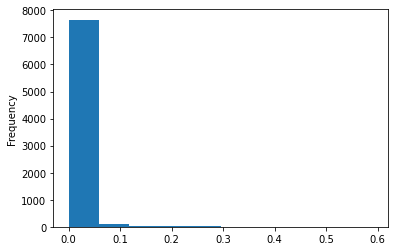

In [24]:
mag.impurity.plot.hist();

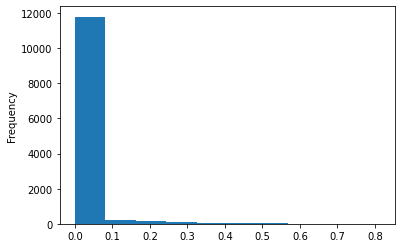

In [25]:
wiki.impurity.plot.hist();

In [38]:
mag = mag[mag['impurity'] <= .03].drop(['impurity', 'content'], axis = 1)
wiki = wiki[wiki['impurity'] <= .03].drop(['impurity', 'content'], axis = 1)

In [39]:
mag.to_csv(BASE_PATH/'magazine_files.csv', index = False)
wiki.to_csv(BASE_PATH/'wikitext_files.csv', index = False)

## Checking Proper Tokenizing or Not

In [40]:
mag = pd.read_csv(BASE_PATH/'magazine_files.csv')
wiki = pd.read_csv(BASE_PATH/'wikitext_files.csv')

In [41]:
mag['content'] = mag['file_path'].progress_apply(open_files)
wiki['content'] = wiki['file_path'].progress_apply(open_files)

100%|██████████| 11227/11227 [00:01<00:00, 7346.45it/s]


In [ ]:
tok = WordTokenizer(lang='ml')

In [ ]:
def get_sample(wiki_=True, size = 1, random_state = 32):
    if wiki_:
        return first(wiki.sample(size)['content'], random_state=32)
    return first(mag.sample(size)['content'], random_state=32)

In [ ]:
coll_repr(first(tok([get_sample()])), 50)

"(#48) ['ഭാരതീയസംഗീതപദ്ധതികളിൽ','ഉപയോഗിക്കപ്പെടുന്ന','സപ്തസ്വരങ്ങളിൽ','അഞ്ചാമത്തേതാണ്\\u200c','പഞ്ചമം.','സ്വരം','പാടുന്നതിനും','സൂചിപ്പിക്കുന്നതിനും','പ','എന്ന','അക്ഷരം','ഉപയോഗിക്കുന്നു.','കർണ്ണാടകസംഗീതത്തിൽ','ഷഡ്ജവും','പഞ്ചമവും','പ്രകൃതിസ്വരങ്ങളായി','കണക്കാക്കുന്നു.','പഞ്ചമത്തെ','കുയിലിന്റെ','സ്വരത്തോടാണ്\\u200c','താരതമ്യപ്പെടുത്താറുള്ളത്.','\\n','ഭാരതീയശാസ്ത്രീയസംഗീതപദ്ധതികളിൽ','ശ്രുതിഭേദങ്ങളില്ലാത്ത','പ്രകൃതിസ്വരങ്ങളായ','ഷഡ്ജം',',','പഞ്ചമം','എന്നിവ','മീട്ടുന്ന','രീതിയിലാണ്\\u200c','വയലിൻ',',','വീണ','മുതലായവയുടെ','കമ്പികൾ','ക്രമീകരിക്കുന്നത്.','\\n','കർണ്ണാടകസംഗീത','സംഗീതവുമായി','ബന്ധപ്പെട്ട','ഈ','ലേഖനം','അപൂർണ്ണമാണ്\\u200c.','ഇതു','വികസിപ്പിക്കുവാൻ','സഹായിക്കുക.','\\n']"

In [ ]:
# 'കണക്കാക്കുന്നു.' tokenizer is not separating the fullstop.

In [ ]:
coll_repr(first(tok([get_sample(False)])), 50)

"(#443) ['ട്രാഫിക്','രാമസ്വാമി','എന്നറിയപ്പെടുന്ന','കെ.','ആർ','രാമസ്വാമി','ഒരു','അഴിമതി','വിരുദ്ധ','പ്രവർത്തകനാണ്.','ഉന്നതരുടെയും','ശക്തരുടെയും','അനധികൃത','പോസ്റ്ററുകളും','പരസ്യബോർഡുകളും','ചെന്നൈയിലെ','തെരുവോരങ്ങളിൽ','നിന്ന്','എടുത്തുമാറ്റാനുള്ള','ശ്രമങ്ങളാണ്','രാമസ്വാമിയെ','വ്യത്യസ്\\u200dതനാക്കിയത്.','അതിനായി','കോടതിയെ','സമീപിക്കാനും','അദ്ദേഹം','മടി','കാണിച്ചിരുന്നില്ല.','തന്റെ','വഴിയിൽ','ഒരു','തടസമാകാൻ','വാർദ്ധക്യത്തെ','അദ്ദേഹം','ഒരിക്കലും','അനുവദിച്ചിരുന്നുമില്ല.','എന്നാൽ',',','ജനങ്ങളുടെ','ആവശ്യങ്ങൾക്ക്','വേണ്ടി','പ്രവർത്തിച്ച','അദ്ദേഹം','ഹൃദയാഘാതത്തെ','തുടർന്ന്','ചൊവ്വാഴ്ച','രാത്രി','ചെന്നൈയിലെ','രാജീവ്','ഗാന്ധി'...]"

In [ ]:
mag[mag['content'].str.contains('ലോസ് കാബോസ്')]

,file_path,dataset_name,length,content
5047,datasets/magazine_raw/mag5731.txt,magazine_text,1692,"ലോസ് കാബോസ്: മെക്സിക്കോയിലെ ഏറ്റവും മികച്ച റിസോര്‍ട്ടായ വിഡാന്ത, ലോകത്തിലെ തന്നെ മികച്ച ജോലിക്കായി അപേക്ഷ ക്ഷണിക്കുന്നു. ജോലി വളരെ സിമ്പിളാണ്. അവരുടെ വിവിധ റിസോര്‍ട്ടുകളില്‍ താമസിക്കണം. മികച്ച മെക്സിക്കന്‍ ഷെഫ് ഉണ്ടാക്കുന്ന ഭക്ഷണം കഴിക്കണം. കരീബിയന്‍ സമുദ്രത്തില്‍ തിമിംഗലക്കുഞ്ഞുങ്ങള്‍ക്കൊപ്പം കുളിക്കണം അങ്ങനെ... അങ്ങനെ... ഒരു വിനോദസഞ്ചാരിയാവുകയാണ് ജോലി. ശമ്പളമോ വര്‍ഷത്തില്‍ എണ്‍പത് ലക്ഷത്തിനു മുകളില്‍. ഭക്ഷണത്തിനുള്ള കാര്‍ഡുകളും, യാത്രാ ചെലവും പുറമേയും കിട്ടും. അപേക്ഷ അയച്ച് തെരഞ്ഞെടുക്കപ്പെട്ടാല്‍ റിസോര്‍ട്ടിന്‍റെ ബ്രാൻഡ് അംബാസഡറായി മാറാം. ഒപ്പം വിവിധ സ്ഥലങ്ങളിലെ വിഡാന്തയിലെ റിസോര്‍ട്ടുക..."


In [ ]:
sample = '''മികച്ച... മെക്സിക്കന്‍. ഷെഫ്-ഉണ്ടാക്കുന്; .ഭക്ഷണം കഴിക്കണം! കരീബിയന്‍ സമുദ്രത്തില്‍ തിമിംഗലക്കുഞ്ഞുങ്ങള്‍ക്കൊപ്പം കുളിക്കണം അങ്ങനെ... അങ്ങനെ... ഒരു വിനോദസഞ്ചാരിയാവുകയാണ് ജോലി... ശമ്പളമോ വര്‍ഷത്തില്‍ എണ്‍പത് ലക്ഷത്തിനു മുകളില്‍. ഭക്ഷണത്തിനുള്ള കാര്‍ഡുകളും, "യാത്രാ" ചെലവും പുറമേയും കിട്ടും. അപേക്ഷ അയച്ച് തെരഞ്ഞെടുക്കപ്പെട്ടാല്‍ റിസോര്‍ട്ടിന്‍റെ ബ്രാൻഡ് അംബാസഡറായി മാറാം. '''

In [ ]:
coll_repr(first(tok([sample])), 10)

"(#41) ['മികച്ച','...','മെക്സിക്കന്\\u200d.','ഷെഫ്-ഉണ്ടാക്കുന്',';','.ഭക്ഷണം','കഴിക്കണം','!','കരീബിയന്\\u200d','സമുദ്രത്തില്\\u200d'...]"

In [ ]:
class SpacyTokenizer():
    
    "Spacy Customized tokenizer for `lang`"
    
    def __init__(self, lang='ml', special_toks=None, buf_sz=5000):
        self.special_toks = ifnone(special_toks, defaults.text_spec_tok)
        nlp = spacy.blank(lang)
        for w in self.special_toks: nlp.tokenizer.add_special_case(w, [{ORTH: w}])
        self.pipe,self.buf_sz = nlp.pipe,buf_sz

    def __call__(self, items):
        return (L(doc).attrgot('text') for doc in self.pipe(map(str,items), batch_size=self.buf_sz))


In [ ]:
from spacy.tokenizer import Tokenizer as sTokenizer
from spacy.util import compile_prefix_regex, \
 compile_infix_regex, compile_suffix_regex

In [ ]:
prefixes = [pattern for pattern in nlp.Defaults.prefixes
             if pattern not in ['-', '_', '#']]

suffixes = [pattern for pattern in nlp.Defaults.suffixes
             if pattern not in ['_']]
            
infixes =  [pattern for pattern in nlp.Defaults.infixes
            if not re.search(pattern, 'xx-xx')]


In [ ]:
sample = '''മികച്ച... മെക്സിക്കന്‍. ഷെഫ്-ഉണ്ടാക്കുന്; .ഭക്ഷണം കഴിക്കണം! '''

In [ ]:
nlp = spacy.blank('ml')

nlp.tokenizer = sTokenizer(vocab = nlp.vocab,
 rules = nlp.Defaults.tokenizer_exceptions,
 prefix_search = compile_prefix_regex(prefixes).search,
 suffix_search = compile_suffix_regex(['.']).search,
 infix_finditer = compile_infix_regex(infixes).finditer,
 token_match = nlp.Defaults.token_match)


In [ ]:
list(nlp(sample))

[മ,
 ി,
 ക,
 ച,
 ്,
 ച,
 .,
 .,
 .,
 മ,
 െ,
 ക,
 ്,
 സ,
 ി,
 ക,
 ്,
 ക,
 ന,
 ്,
 ‍,
 .,
 ഷ,
 െ,
 ഫ,
 ്,
 -,
 ഉ,
 ണ,
 ്,
 ട,
 ാ,
 ക,
 ്,
 ക,
 ു,
 ന,
 ്,
 ;,
 .,
 ഭ,
 ക,
 ്,
 ഷ,
 ണ,
 ം,
 ക,
 ഴ,
 ി,
 ക,
 ്,
 ക,
 ണ,
 ം,
 !]

In [ ]:
nlp = spacy.blank('ml')

In [ ]:
list(nlp(sample))

[മികച്ച,
 ...,
 മെക്സിക്കന്‍.,
 ഷെഫ്-ഉണ്ടാക്കുന്,
 ;,
 .ഭക്ഷണം,
 കഴിക്കണം,
 !,
 കരീബിയന്‍,
 സമുദ്രത്തില്‍,
 തിമിംഗലക്കുഞ്ഞുങ്ങള്‍ക്കൊപ്പം,
 കുളിക്കണം,
 അങ്ങനെ,
 ...,
 അങ്ങനെ,
 ...,
 ഒരു,
 വിനോദസഞ്ചാരിയാവുകയാണ്,
 ജോലി,
 ...,
 ശമ്പളമോ,
 വര്‍ഷത്തില്‍,
 എണ്‍പത്,
 ലക്ഷത്തിനു,
 മുകളില്‍.,
 ഭക്ഷണത്തിനുള്ള,
 കാര്‍ഡുകളും,
 ,,
 ",
 യാത്രാ,
 ",
 ചെലവും,
 പുറമേയും,
 കിട്ടും.,
 അപേക്ഷ,
 അയച്ച്,
 തെരഞ്ഞെടുക്കപ്പെട്ടാല്‍,
 റിസോര്‍ട്ടിന്‍റെ,
 ബ്രാൻഡ്,
 അംബാസഡറായി,
 മാറാം.]